# Guessing BUILDING. MODELS

# Libraries

In [1]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

# Classification Models
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# tools
from sklearn.model_selection import train_test_split

# classification model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

# To save/load the ML models
import joblib

# Functions

In [2]:
def makePredictions(loaded_model, X_test, y_test, name, output_file):
    # make predictions
    model_predictions = loaded_model.predict(X_test)
    
    # Accuracy 
    accuracy = accuracy_score(y_test, model_predictions) 
    #  print("Accuracy: ", round(accuracy, 3))
        
    # Confussion Matrix
    plot_confusion_matrix(loaded_model, X_test, y_test, cmap = 'Oranges') 
    
    plt.title('Guessing Building. Confusion matrix model :'+ str(name))

    plt.rcParams['figure.figsize'] = [10,5]
    #plt.rcParams['figure.figsize'] = [20, 10]
    
    plt.ylabel('Actual Building')
    plt.xlabel('Predicted Building\naccuracy={:0.4f}'.format(accuracy))
    
#    plt.savefig(output_file, format= "png",bbox_inches='tight' )
    
    plt.show()  
    
    
    f1 = f1_score(y_test, model_predictions, average="macro")
    print("f1 Score: ", f1)
    
    
    return accuracy, name

In [3]:
def lolipop (values, group, xmin, title, xlabel, ylabel, color, output_file):
# Create a dataframe of r2
    df = pd.DataFrame({'values': values,
                       'group': group })

    # Reorder it based on the valuesc
    ordered_df = df.sort_values(by='values')
    my_range=range(1,len(df.index)+1)

    plt.style.use('fivethirtyeight')
    
    # The horizontal plot is made using the hline function
    plt.hlines(y=my_range, xmin=xmin, xmax=ordered_df['values'], color=color)
    
    
    plt.plot(ordered_df['values'], my_range, "o")

    # Add titles and axis names
    plt.yticks(my_range, ordered_df['group'])
    plt.title(title, loc='left')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.rcParams['figure.figsize'] = [8,2]
    #plt.rcParams['figure.figsize'] = [15, 6]
    
    plt.savefig(output_file, format= "png",bbox_inches='tight' )
    # Show the plot
    plt.show()

In [4]:
def load_model (file_name):
    path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/MLmodels/'
 
    # Load the model from the file
    model_from_joblib = joblib.load(path + file_name)
    
    return model_from_joblib

# Load Data

In [5]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file_X = "1_Val_DataPrepro_Building_X.csv"
file_y = "1_Val_DataPrepro_Building_y.csv"

X = pd.read_csv(path + file_X)
y = pd.read_csv(path + file_y)

print(y.head())
X.head()


   BUILDINGID
0           1
1           2
2           2
3           2
4           0


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP009,WAP017,WAP018,WAP021,...,WAP506,WAP507,WAP509,WAP510,WAP511,WAP512,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


# Train/Test Split

As this is validation data, only used to thest the trained model, there is no need to divide into train/test. The 100% of this unseen data will be used to validate the models. 

### Load k-NN

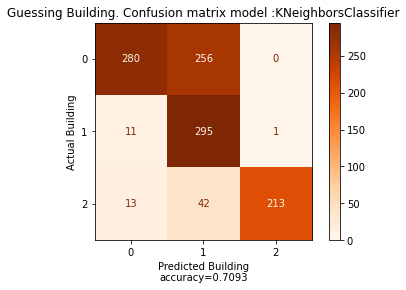

f1 Score:  0.7353465498693715


In [6]:
file = 'Building_KNN.joblib'

# Load the model from the file
KNN_from_joblib = load_model(file)

# Use the loaded model to make predictions
KNN_ac, KNN_name = makePredictions(KNN_from_joblib, X, y, 'KNeighborsClassifier', "BUI_CM_KNN")

### Load RF

In [7]:
file = 'Building_RF.joblib'

# Load the model from the file
RF_from_joblib = load_model(file)

# Use the loaded model to make predictions
# Use the loaded model to make predictions
RF_ac, RF_name = makePredictions(RF_from_joblib, X, y, "RandomForestClassifier", "BUI_CM_RF")

ValueError: X has 266 features, but DecisionTreeClassifier is expecting 435 features as input.

### Load Log Reg

In [ ]:
file = 'Building_LR.joblib'

#Load the model from the file
LR_from_joblib = load_model(file)

# Use the loaded model to make predictions
# Use the loaded model to make predictions
LR_ac, LR_name = makePredictions(LR_from_joblib, X, y, "LogisticRegression", "BUI_CM_LR")

# Comparing Models

In [ ]:
values= [KNN_ac, LR_ac, RF_ac]
group = [KNN_name, LR_name, RF_name]
xmin = 0.975
title = 'Guessing Building'
xlabel = 'Accuracy' 
ylabel = 'Models'
color = 'DarkOliveGreen'

lolipop (values, group, xmin, title, xlabel, ylabel, color, "BUI_acc");